In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
from pandas import DataFrame
from matplotlib import pyplot as plt

## 문제1)

In [2]:
score = {'언어영역' : [392, 404, 346, 382, 368, 449, 391],
        '수리영역' : [428, 518, 376, 426, 409, 490, 448]}

corr,p_value = stats.pearsonr(score['언어영역'], score['수리영역'])
print("corr: {0}, p_value: {1}".format(corr, p_value))

corr: 0.8210642074423062, p_value: 0.023563708235834223


In [3]:
score = DataFrame(score)

In [4]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["axes.unicode_minus"] = False

          언어영역      수리영역
언어영역  1.000000  0.821064
수리영역  0.821064  1.000000


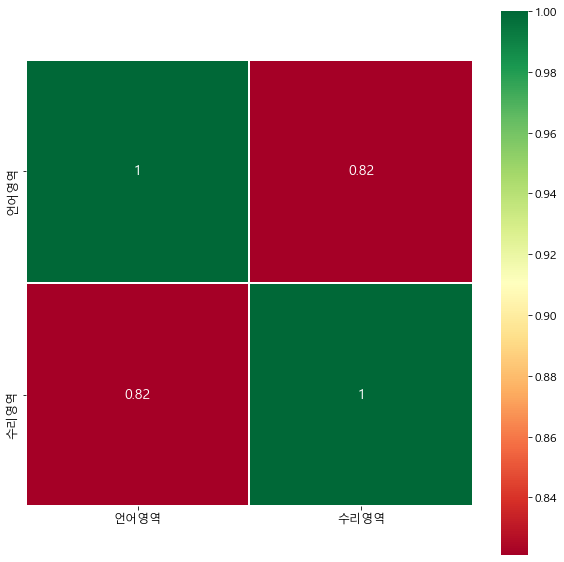

In [5]:
corr = score.corr()

print(corr)
ax = sns.heatmap(corr,
                square = True,
                cmap='RdYlGn',
                linewidth = 0.1,
                linecolor = 'white',
                annot = True,
                annot_kws={'size' : 14})

plt.show()

Text(0.5, 1.0, '언어, 수리영역 관계')

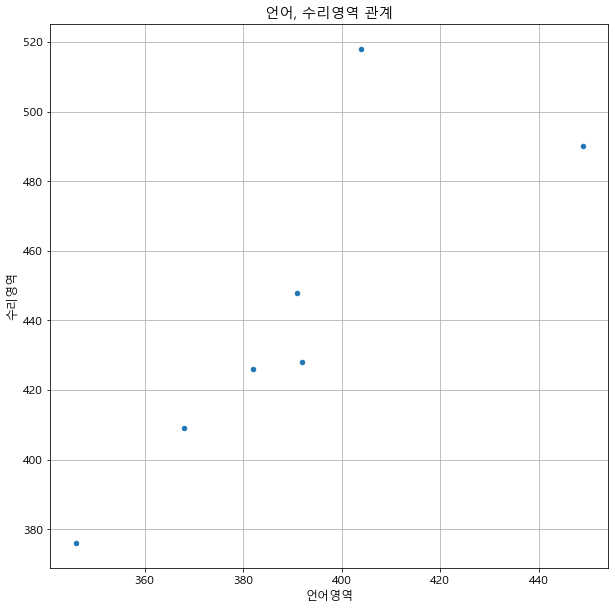

In [6]:
score.plot.scatter('언어영역','수리영역')
plt.grid()
plt.title('언어, 수리영역 관계')

## 문제2)

In [7]:
score = DataFrame({'학생번호' : [1,2,3,4,5,6,7,8,9,10],
                  '수학' : [66,64,48,46,78,60,90,50,66,70],
                  '물리' : [70,68,46,48,84,64,92,52,68,72],
                  '음악' : [80,70,88,66,76,86,84,74,60,78]}).set_index('학생번호')

score

,수학,물리,음악
학생번호,,,
1,66,70,80
2,64,68,70
3,48,46,88
4,46,48,66
5,78,84,76
6,60,64,86
7,90,92,84
8,50,52,74
9,66,68,60


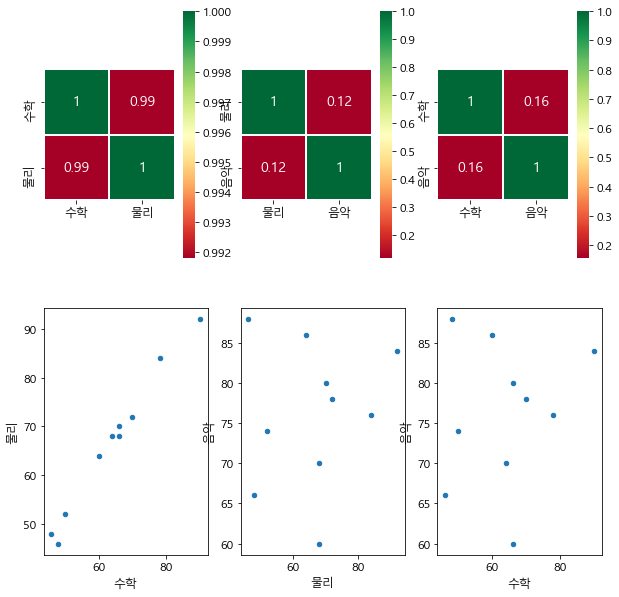

In [8]:
fig, ax = plt.subplots(2,3)

corr_list = [score.filter(['수학', '물리']).corr(), score.filter(['물리', '음악']).corr(), score.filter(['수학', '음악']).corr()]

for i in range(0, len(corr_list)):
    sns.heatmap(corr_list[i],
                ax = ax[0][i],
                square = True,
                cmap='RdYlGn',
                linewidth = 0.1,
                linecolor = 'white',
                annot = True,
                annot_kws={'size' : 14})
for i in range(0, len(corr_list)):
    keys = list(corr_list[i].index)
    
    score.plot.scatter(x = keys[0], y = keys[1], ax = ax[1][i])

## 문제3)

In [9]:
df = DataFrame({'홈런수' : [174, 163, 161, 230, 214, 194, 187, 167, 190, 196, 199, 173, 213, 172],
               '평균타율' : [0.277, 0.276, 0.272, 0.272, 0.269, 0.266, 0.263, 0.262, 0.262, 0.261, 0.259, 0.258, 0.257, 0.252]})

df

,홈런수,평균타율
0,174,0.277
1,163,0.276
2,161,0.272
3,230,0.272
4,214,0.269
5,194,0.266
6,187,0.263
7,167,0.262
8,190,0.262
9,196,0.261


In [10]:
corr, pvalue = stats.pearsonr(df['홈런수'], df['평균타율'])
print('상관계수: {0}, pvalue: {1}'.format(corr,pvalue))

상관계수: -0.07469493488185412, pvalue: 0.7996661879546081


<AxesSubplot:xlabel='홈런수', ylabel='평균타율'>

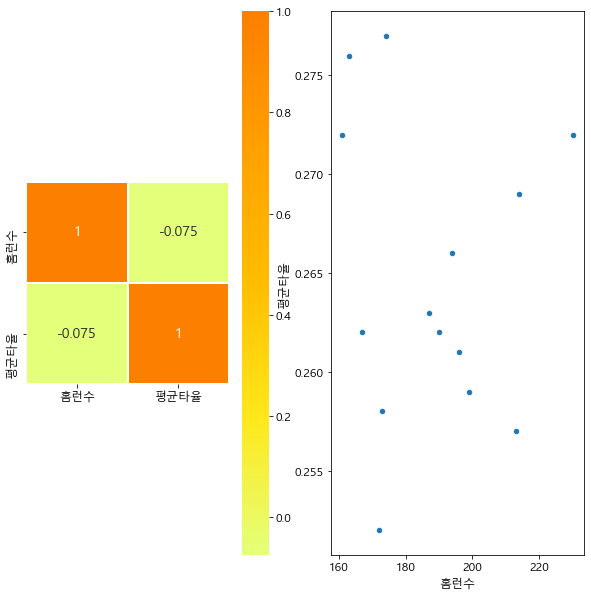

In [11]:
corr = df.corr()

fig,ax = plt.subplots(1,2)

sns.heatmap(corr,
            ax = ax[0],
            square = True,
            cmap='Wistia',
            linewidth = 0.1,
            linecolor = 'white',
            annot = True,
            annot_kws={'size' : 14})

df.plot.scatter(x = '홈런수', y = '평균타율',ax = ax[1])

- 상관계수가 -0.075로 거의 상관이 없다.

## 문제4)

<AxesSubplot:xlabel='x', ylabel='y'>

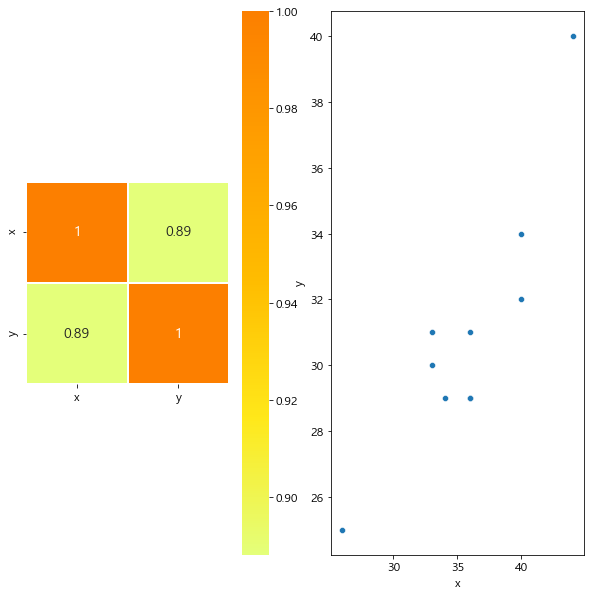

In [12]:
df = DataFrame({'x' : [36, 40, 34, 44, 33, 36, 40, 33, 26, 36],
               'y' : [29, 32, 29, 40, 31, 29, 34, 30, 25, 31]})

corr = df.corr()

fig,ax = plt.subplots(1,2)

sns.heatmap(corr,
                ax = ax[0],
                square = True,
                cmap='Wistia',
                linewidth = 0.1,
                linecolor = 'white',
                annot = True,
                annot_kws={'size' : 14})

sns.scatterplot(x='x', y='y', data=df, ax = ax[1])

- 상관계수가 0.89로 꽤 높은 양의 상관관계가 있다.

## 문제5-1)

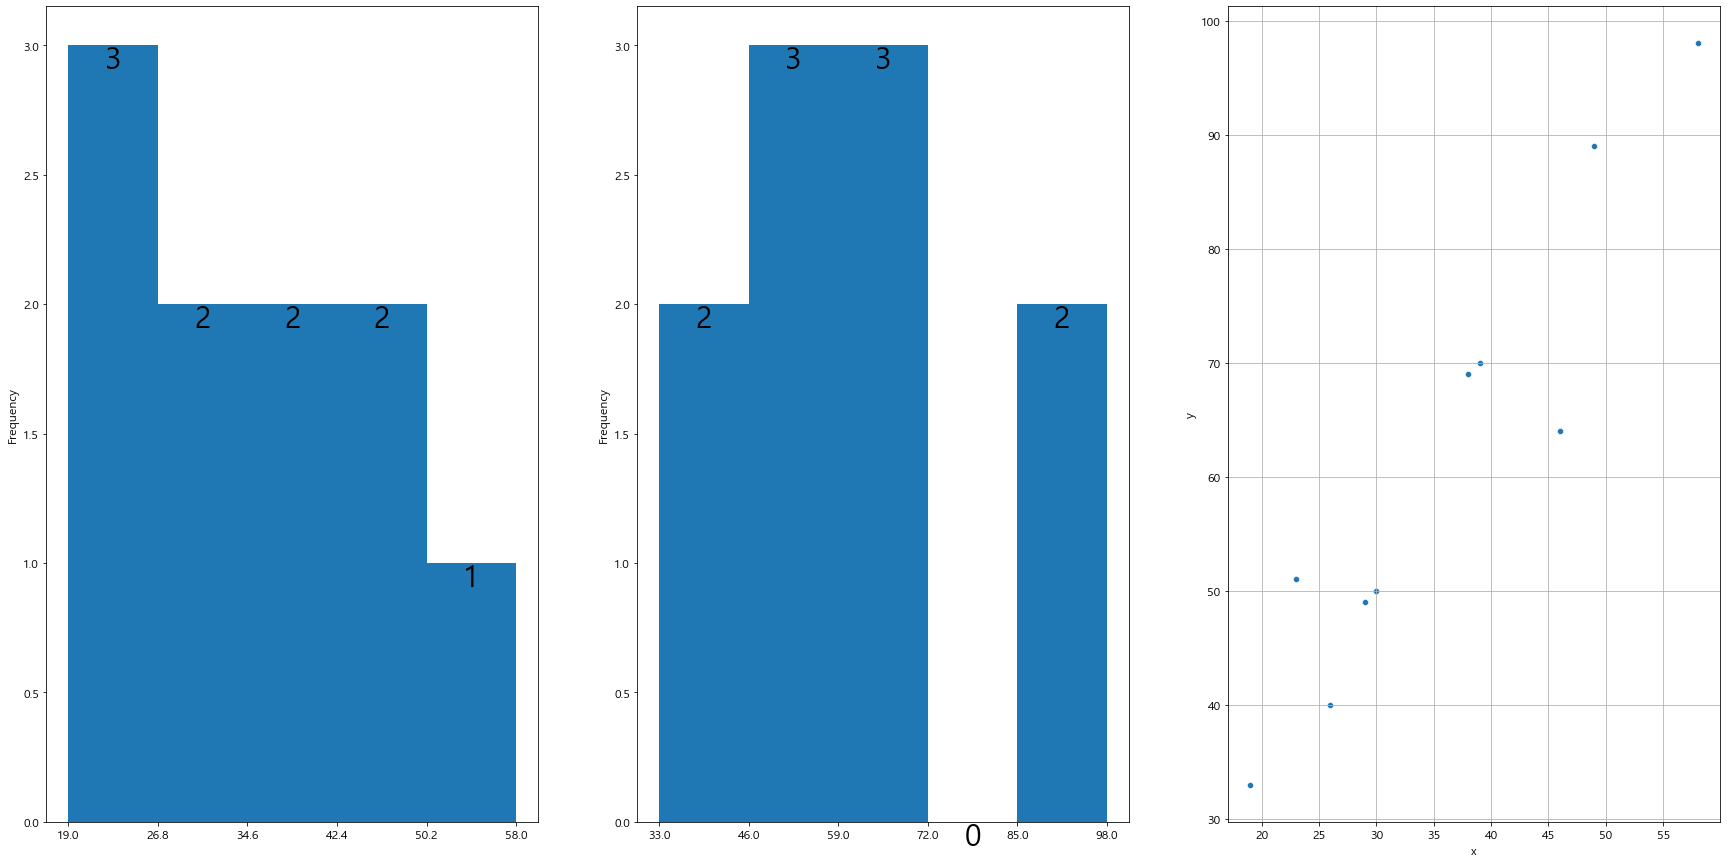

In [13]:
df = DataFrame({'x' : [19, 23, 26, 29, 30, 38, 39, 46, 49, 58],
               'y' : [33, 51, 40, 49, 50, 69, 70, 64, 89, 98]})

fig,ax = plt.subplots(1,3, figsize = (30,15))

n_x, bins_x = np.histogram(df['x'], bins=5, range=(df['x'].min(), df['x'].max()))
n_y, bins_y = np.histogram(df['y'], bins=5, range=(df['y'].min(), df['y'].max()))

df['x'].plot.hist(ax = ax[0], bins = 5, range = (df['x'].min(), df['x'].max()))

ax[0].set_xticks(bins_x)
ax[0].set_xticklabels(bins_x)

# 출력할 데이터 수 만큼 반복
for i, w in enumerate(n_x):    
    x = bins_x[i] + ((bins_x[i+1]-bins_x[i]) / 2)
    
     #텍스트 출력 -> x좌표, y좌표, 내용, 글자크기, 색상, 텍스트가로정렬, 세로정렬
    ax[0].text(x, w, w, fontsize=30, color='#000000', horizontalalignment='center', verticalalignment='top')
    
df['y'].plot.hist(ax = ax[1], bins = 5, range = (df['y'].min(), df['y'].max()))

ax[1].set_xticks(bins_y)
ax[1].set_xticklabels(bins_y)

# 출력할 데이터 수 만큼 반복
for i, w in enumerate(n_y):    
    x = bins_y[i] + ((bins_y[i+1]-bins_y[i]) / 2)
    
     #텍스트 출력 -> x좌표, y좌표, 내용, 글자크기, 색상, 텍스트가로정렬, 세로정렬
    ax[1].text(x, w, w, fontsize=30, color='#000000', horizontalalignment='center', verticalalignment='top')
    
    
sns.scatterplot(x='x', y='y', data=df, ax = ax[2])
ax[2].grid()

## 문제5-2)

In [14]:
# 대립가설 예약대수와 판매대수의 평균에 차이가 있다.
# 귀무가설 예약대수와 판매대수는 같다.

tTestResult = stats.ttest_ind(df['x'], df['y'])
tTestResult

# 귀무가설을 기각한다. 예약대수와 판매대수의 평균에 차이가 있다.

Ttest_indResult(statistic=-3.334657806571363, pvalue=0.0036879105056452813)

## 문제5-3)

In [15]:
corr, pvalue = stats.pearsonr(df['x'], df['y'])
print('상관계수: {0}, pvalue: {1}'.format(corr,pvalue))

# 상관계수가 0.95 정도로 상당한 양의 상관관계가 있다.

상관계수: 0.9469131855513355, pvalue: 3.258261740140739e-05


Text(19, 88, '판매대수 = 1.575101 x 예약대수 + 5.068887')

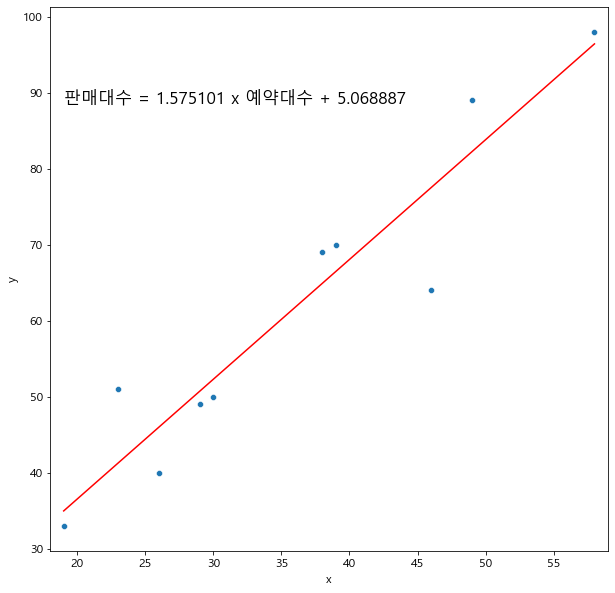

In [16]:
plt.figure()

z = np.polyfit(df['x'], df['y'] , 1)
a, b = z
f = np.poly1d(z)

sns.scatterplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'],f(df['x']),'#ff0000')
plt.xlim(df['x'].min()-1, df['x'].max()+1)

plt.text(df['x'].min(), df['y'].max()-10,
        '판매대수 = %f x 예약대수 + %f' %(a,b),
        fontsize = 17, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')

## 문제5-4)

In [17]:
from statsmodels.formula.api import ols
import scipy

In [18]:
res = ols('y ~ x', data=df).fit()
res.summary()

c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           3.26e-05
Time:                        11:54:30   Log-Likelihood:                -32.667
No. Observations:                  10   AIC:                             69.33
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0689      7.113      0.713      0.496     -11.333      21.471
x              1.5751      0.189      8.331      0.000       1.139       2.011
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   2.910
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.497
Skew:                          -0.541   Prob(JB):                        0.780
Kurtosis:                       2.849   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`판매대수` 에 대하여 `예약대수`로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다.
$F(1,8) = 69.40, p < 0.05$


`예약대수` 의 회귀계수는 1.5751로, 판매대수에 대하여 유의미한 예측변인인 것으로 타나났다. 
$t(8) = 8.331, p < 0.05$


## 문제5-5)

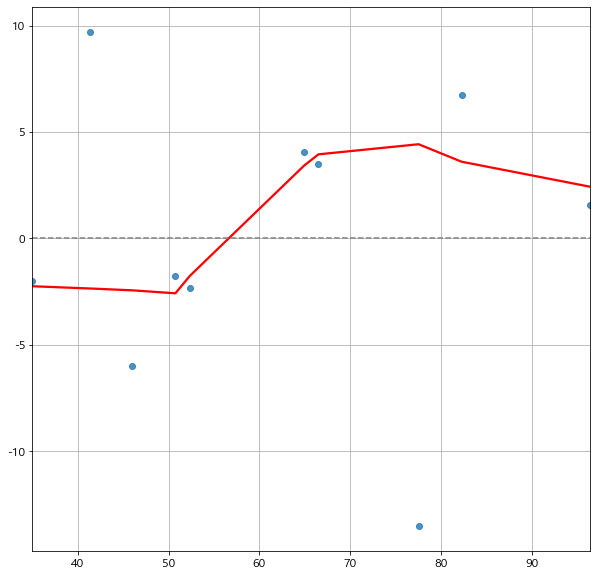

In [19]:
# 모형의 선형성

fitted = res.predict(df)

residual = df['y'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.grid()
plt.show()



어느정도 선형을 띔

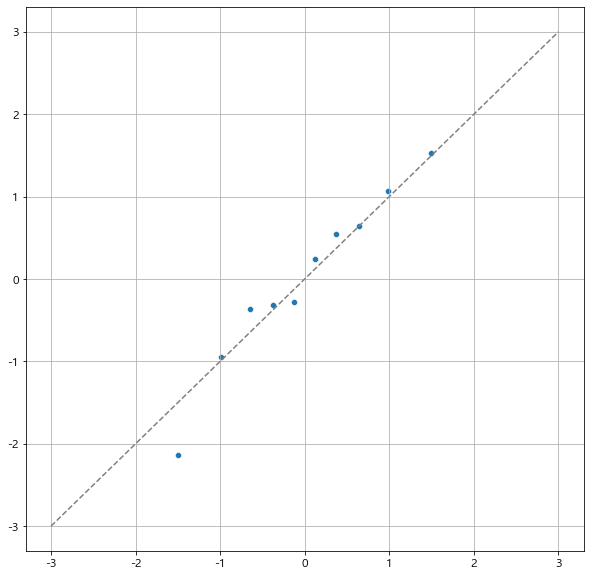

In [20]:
# Q-Q plot

sr = scipy.stats.zscore(residual)
(x, y), fig = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], linestyle='--', color='grey')
plt.grid()

plt.show()

점들이 점선을 따라 배치되어 있으므로 정규분포를 따름

In [21]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9645063281059265, pvalue=0.835770308971405)

유의 수준 5%에서 잔차의 정규성을 충족한다.

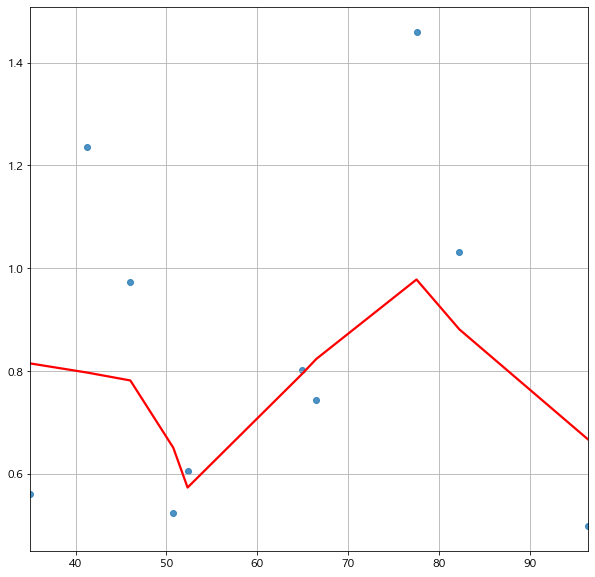

In [22]:
#등분산성 검정

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.grid()
plt.show()

## 문제5-6)

In [23]:
a = res.params.x
b = res.params.Intercept
print('y = %fx + %f' %(a,b))

y = 1.575101x + 5.068887


Text(19, 88, '판매대수 = 1.575101 x 예약대수 + 5.068887')

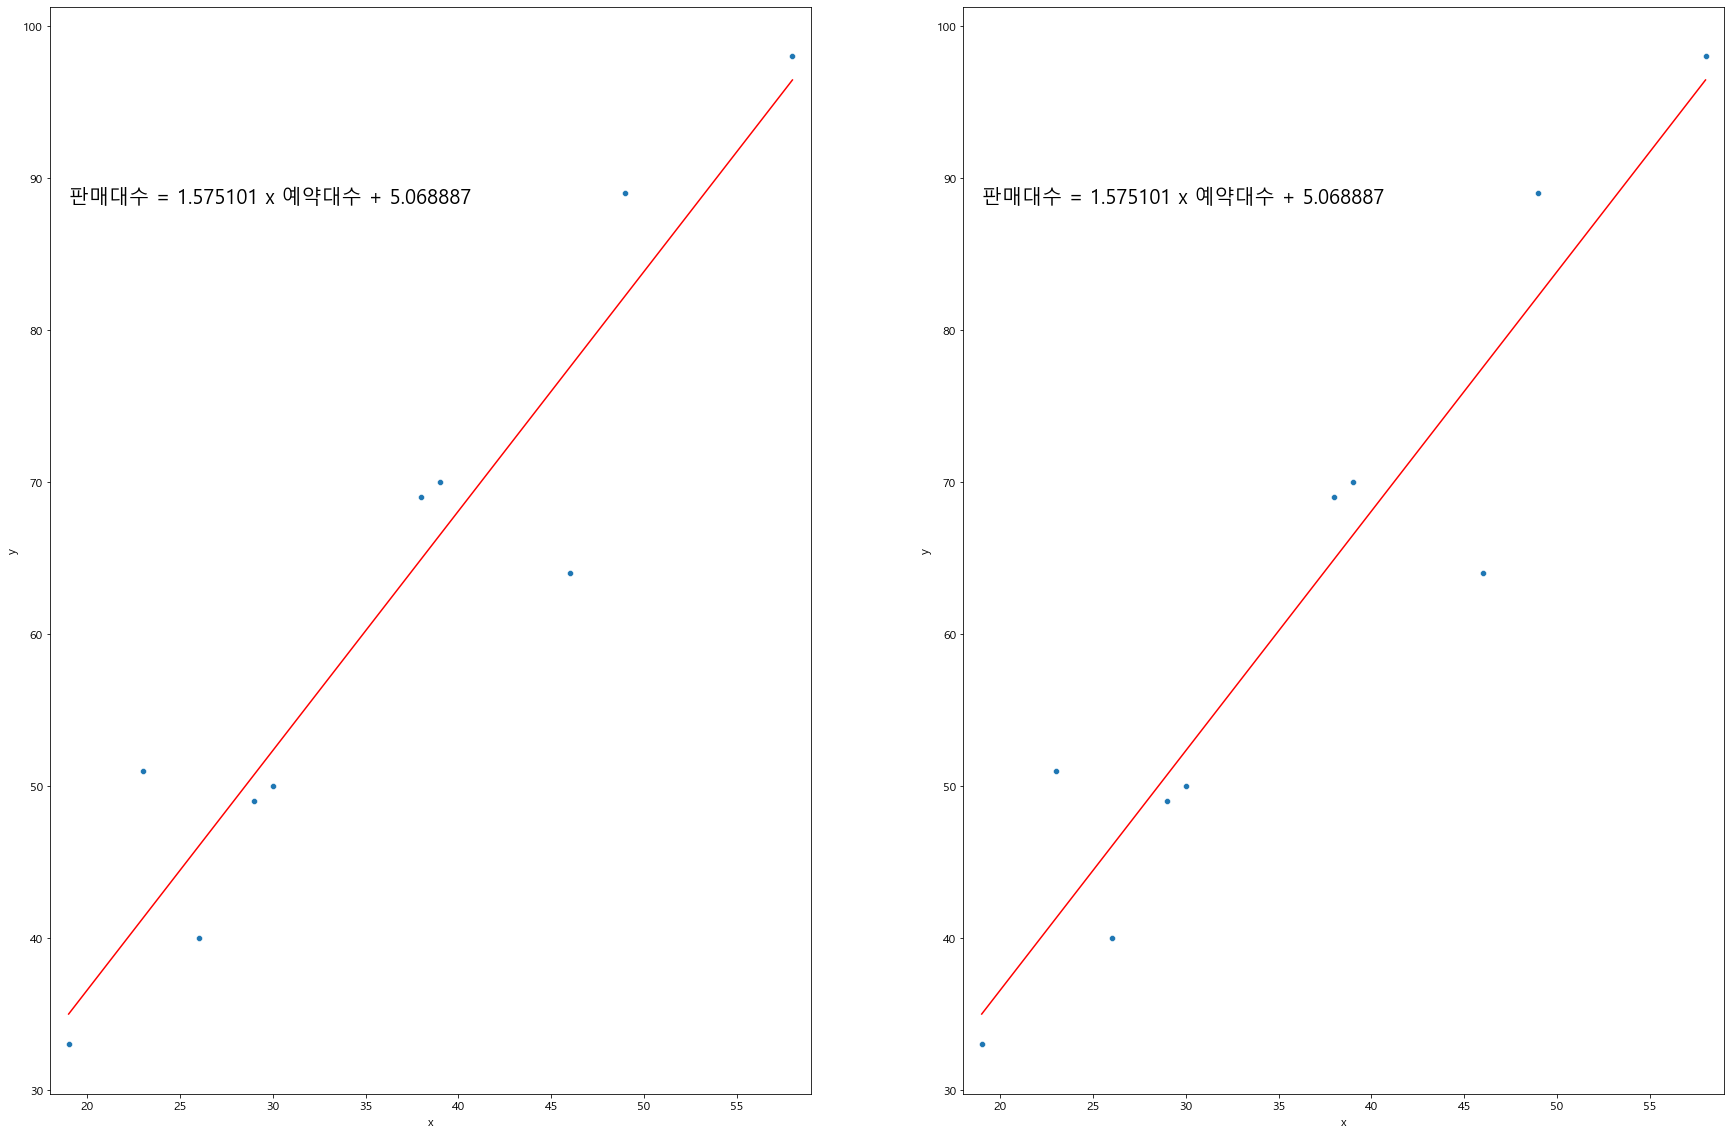

In [24]:
fig ,ax = plt.subplots(1,2,figsize = (30,20))

z = np.polyfit(df['x'], df['y'] , 1)
a, b = z
f = np.poly1d(z)

sns.scatterplot(x = 'x', y = 'y', data = df,ax = ax[0])
ax[0].plot(df['x'],f(df['x']),'#ff0000')
ax[0].set_xlim(df['x'].min()-1, df['x'].max()+1)

ax[0].text(df['x'].min(), df['y'].max()-10,
        '판매대수 = %f x 예약대수 + %f' %(a,b),
        fontsize = 20, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')

#--------------------------------------------------------------------

a = res.params.x
b = res.params.Intercept
f = np.poly1d(z)

sns.scatterplot(x = 'x', y = 'y', data = df,ax = ax[1])
ax[1].plot(df['x'],res.fittedvalues,'#ff0000')
ax[1].set_xlim(df['x'].min()-1, df['x'].max()+1)

ax[1].text(df['x'].min(), df['y'].max()-10,
        '판매대수 = %f x 예약대수 + %f' %(a,b),
        fontsize = 20, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')


## 문제5-7)

Text(100, 229.75896598252973, '판매대수 = 1.575101 x 예약대수 + 5.068887')

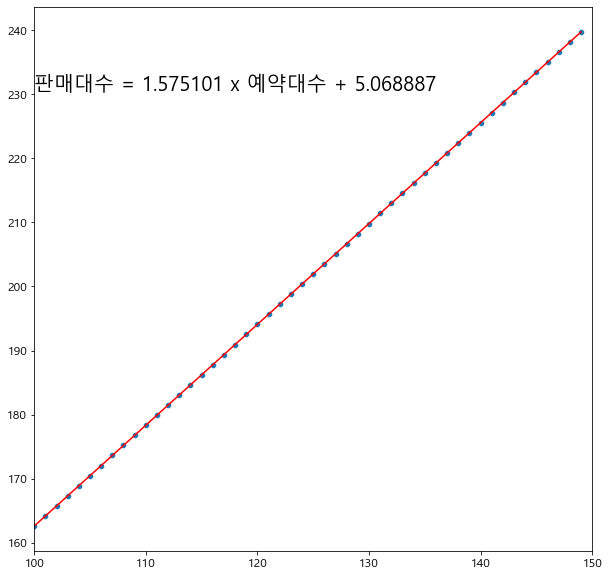

In [25]:
predict = res.predict({'x': list(range(100,150))})

a = res.params.x
b = res.params.Intercept
f = np.poly1d(z)

sns.scatterplot(x = list(range(100,150)), y = predict)
plt.plot(list(range(100,150)),predict,'#ff0000')
plt.xlim(100, 150)

plt.text(100, predict.max()-10,
        '판매대수 = %f x 예약대수 + %f' %(a,b),
        fontsize = 20, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')

## 6)

In [70]:
df = DataFrame({'번호' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
               'X' : [59, 24, 36, 57, 63, 32, 40, 24, 24, 59, 36, 42, 55, 45, 28, 35, 47, 51, 29, 33, 51, 49, 44, 43, 32],
               'Y' : [298, 239, 264, 299, 284, 239, 242, 213, 206, 299, 260, 277, 285, 272, 231, 265, 256, 271, 233, 248, 266, 234, 265, 251, 245]}).set_index('번호')

df

,X,Y
번호,,
1,59,298
2,24,239
3,36,264
4,57,299
5,63,284
6,32,239
7,40,242
8,24,213
9,24,206


<AxesSubplot:xlabel='Y', ylabel='Count'>

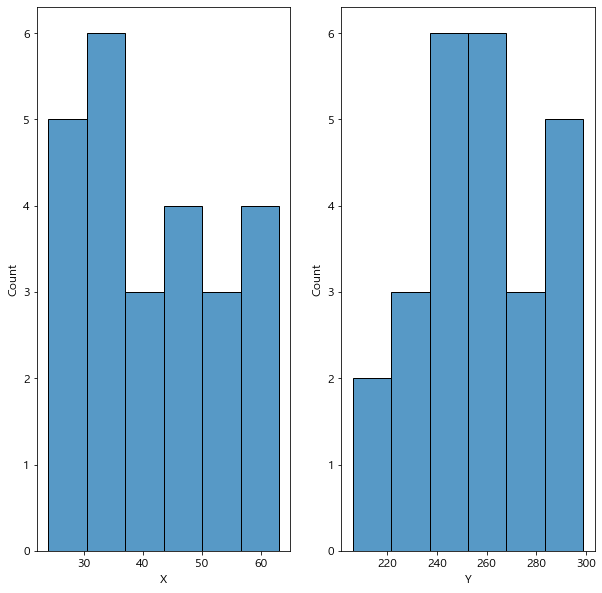

In [71]:
fig, ax = plt.subplots(1,2)

sns.histplot(x = 'X', data = df, ax = ax[0])
sns.histplot(x = 'Y', data = df, ax = ax[1])


<AxesSubplot:xlabel='X', ylabel='Y'>

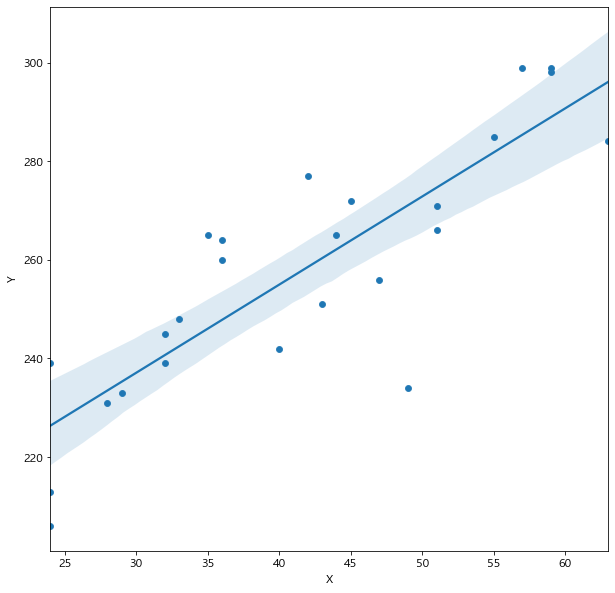

In [72]:
sns.scatterplot(x = 'X', y = 'Y', data = df)
sns.regplot(x = 'X', y = 'Y',data = df)

In [73]:
df.corr()

,X,Y
X,1.000000,0.844454
Y,0.844454,1.000000


- 회귀계수가 0.844로 높은 양의 상관관계가 있다.

In [74]:
model = ols('Y ~ X', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     57.17
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           1.11e-07
Time:                        12:08:45   Log-Likelihood:                -100.03
No. Observations:                  25   AIC:                             204.1
Df Residuals:                      23   BIC:                             206.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.4235     10.201     17.981      0.000     162.321     204.526
X              1.7885      0.237      7.561      0.000       1.299       2.278
==============================================================================
Omnibus:                        3.831   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                2.380
Skew:                          -0.731   Prob(JB):                        0.304
Kurtosis:                       3.381   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared 값이 0.713인것으로 보아 회귀모델의 설명도가 높다
- F(1,23) = 57.17, pvalue < 0.05 로 이 모형은 통계적으로 유의하다.
- t(23) = 7.561, pvalue < 0.05 로 독립변수 X는 통계적으로 유의하다.

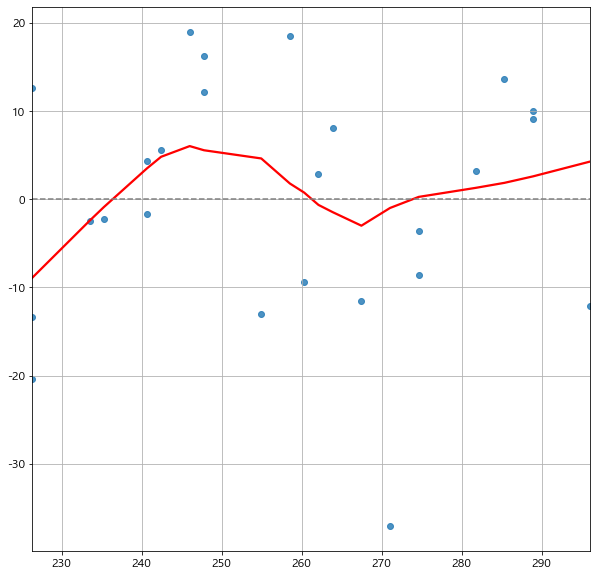

In [75]:
# 잔차의 선형성 체크

fitted = model.predict(df)

residual = df['Y'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.grid()
plt.show()

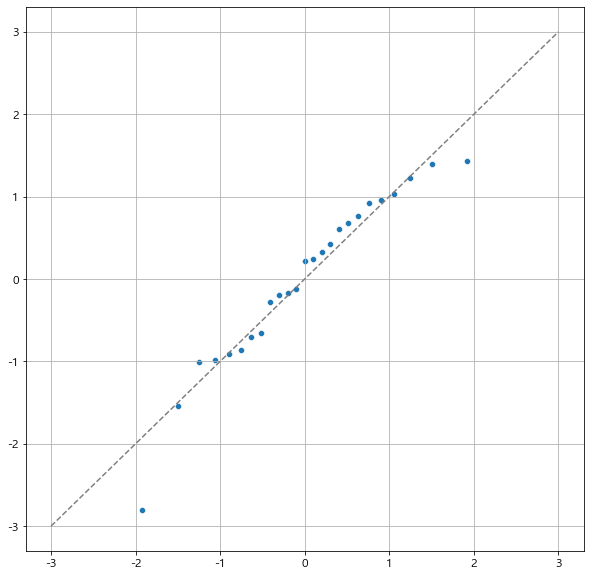

In [76]:
# Q-Q plot
# 잔차의 정규분포 확인

sr = scipy.stats.zscore(residual)
(x, y), fig = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], linestyle='--', color='grey')
plt.grid()

plt.show()

In [77]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9477642178535461, pvalue=0.22313959896564484)

- 유의수준 5%에서 정규성을 충족한다.

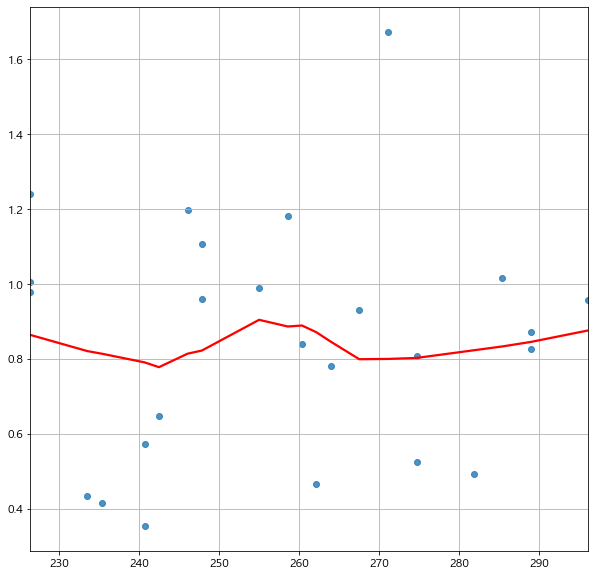

In [78]:
# 등분산성 검정

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.grid()
plt.show()

- 추세선이 거의 선형을 띄므로 등분산성을 만족한다고 본다.

In [79]:
a = model.params.X
b = model.params.Intercept

print('y = %fx + %f' %(a,b))

y = 1.788450x + 183.423547


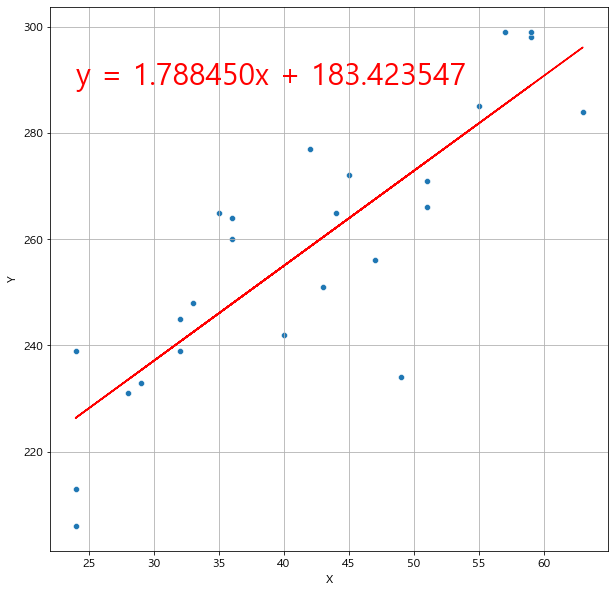

In [80]:
sns.scatterplot(x = 'X', y = 'Y', data =df)
plt.plot(df['X'], model.fittedvalues, color = 'red')

plt.text(df['X'].min(), df['Y'].max()-10,'y = %fx + %f' %(a,b), fontsize = 30, color = 'red')
plt.grid()

Text(0.5, 1.0, '추정 독립변수에 의한 예측값')

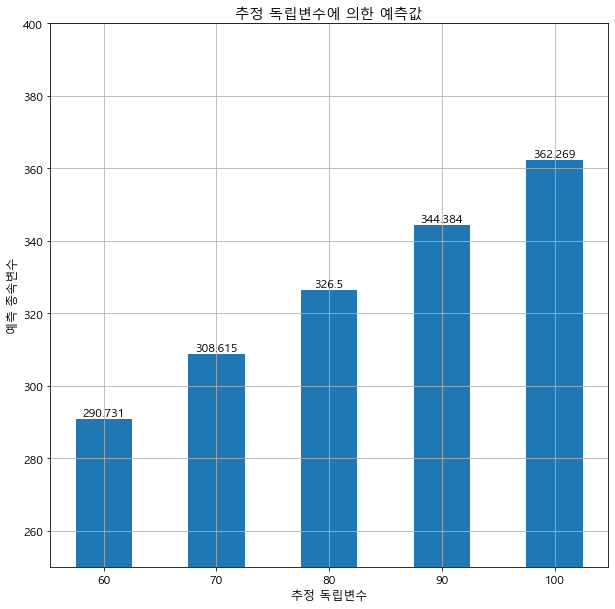

In [81]:
pred_X = np.linspace(60, 100, 5)
pred_Y = model.predict({'X' : pred_X})

plt.figure()
p1 = plt.bar(pred_X, pred_Y, width = 5)
plt.grid()
plt.ylim(250,400)
plt.bar_label(p1)
plt.xlabel('추정 독립변수')
plt.ylabel('예측 종속변수')
plt.title('추정 독립변수에 의한 예측값')


## 7)

In [82]:
df = DataFrame({'x' : [36, 40, 36, 44, 33, 36, 40, 33, 26, 36],
               'y' : [29, 32, 29, 40, 31, 29, 34, 30, 25, 31]})

df

,x,y
0,36,29
1,40,32
2,36,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


<AxesSubplot:xlabel='y', ylabel='Count'>

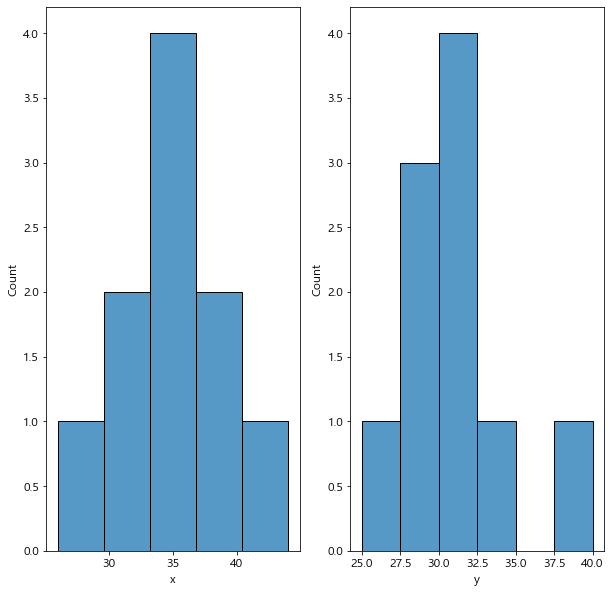

In [83]:
fig, ax = plt.subplots(1,2)

sns.histplot(x = 'x', data = df, ax = ax[0])
sns.histplot(x = 'y', data = df, ax = ax[1])

,x,y
x,1.000000,0.872381
y,0.872381,1.000000


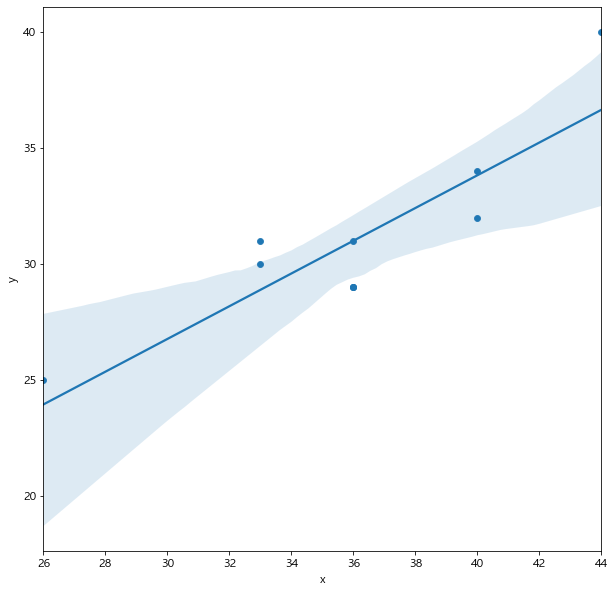

In [40]:
sns.scatterplot(x = 'x', y = 'y', data = df)
sns.regplot(x = 'x', y = 'y',data = df)
df.corr()

- 회귀계수가 0.87로 높은 양의 상관관계가 있다.

In [84]:
model = ols('y ~ x', data=df).fit()
model.summary()

c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     25.48
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           0.000992
Time:                        12:09:42   Log-Likelihood:                -20.227
No. Observations:                  10   AIC:                             44.45
Df Residuals:                       8   BIC:                             45.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5981      5.074      1.103      0.302      -6.102      17.298
x              0.7056      0.140      5.048      0.001       0.383       1.028
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.712
Skew:                           0.323   Prob(JB):                        0.701
Kurtosis:                       1.864   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared 값이 0.761인것으로 보아 회귀모델의 설명도가 높다
- F(1,8) = 25.48, pvalue < 0.05 로 이 모형은 통계적으로 유의하다.
- t(8) = 5.048 pvalue < 0.05 로 독립변수 X는 통계적으로 유의하다.

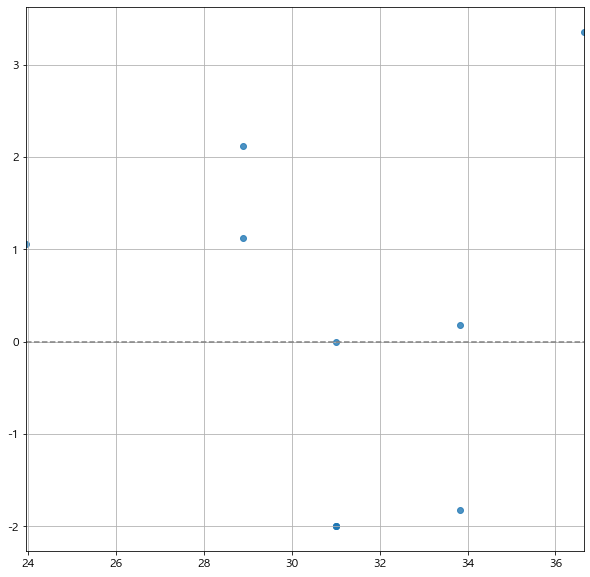

In [85]:
# 잔차의 선형성 확인

fitted = model.predict(df)

residual = df['y'] - fitted

sns.regplot(x=fitted, y=residual,lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.grid()
plt.show()

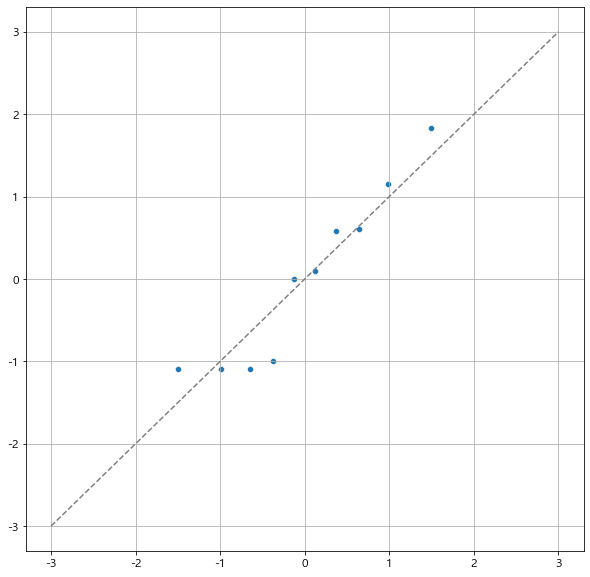

In [86]:
# Q-Q plot
# 잔차의 정규분포 확인

sr = scipy.stats.zscore(residual)
(x, y), fig = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], linestyle='--', color='grey')
plt.grid()

plt.show()

In [87]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.8896058201789856, pvalue=0.16785117983818054)

- 유의수준 5% 에서 유의하다.

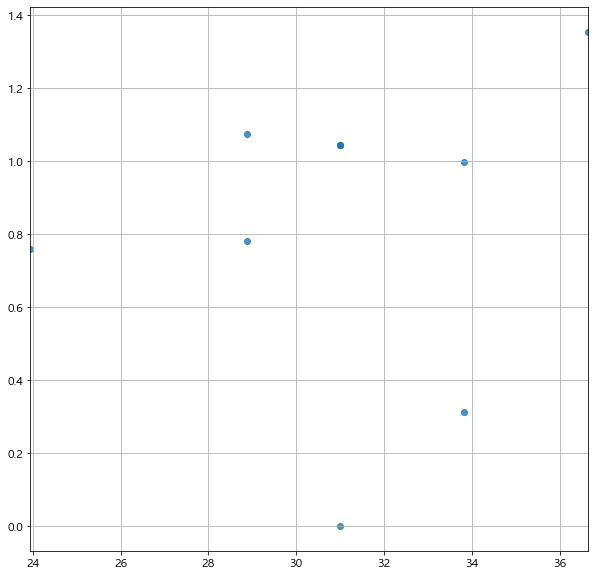

In [88]:
# 등분산성 검정

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws = {'color': 'red'})
plt.grid()
plt.show()

- 잔차의 분산이 일정하지 않은 경향을 보인다.
- 모델의 설명력이 낮다

In [89]:
a = model.params.x
b = model.params.Intercept

print('y = %fx + %f' %(a,b))

y = 0.705607x + 5.598131


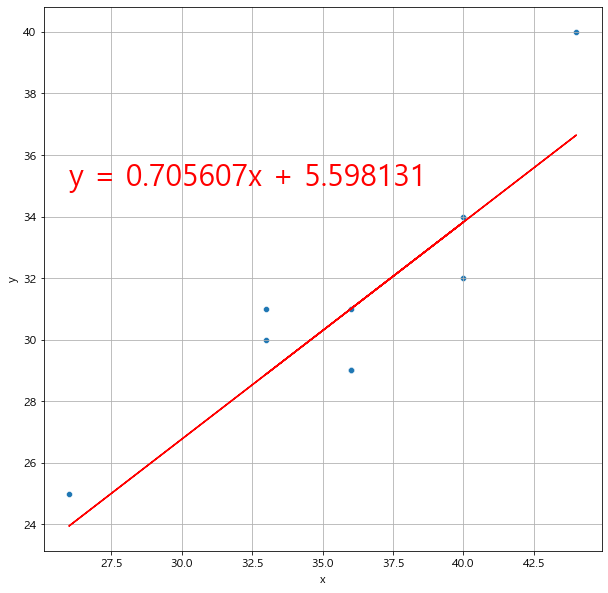

In [90]:
sns.scatterplot(x = 'x', y = 'y', data =df)
plt.plot(df['x'], model.fittedvalues, color = 'red')

plt.text(df['x'].min(), df['y'].max()-5,'y = %fx + %f' %(a,b), fontsize = 30, color = 'red')
plt.grid()

Text(0.5, 1.0, '추정 독립변수에 의한 예측값')

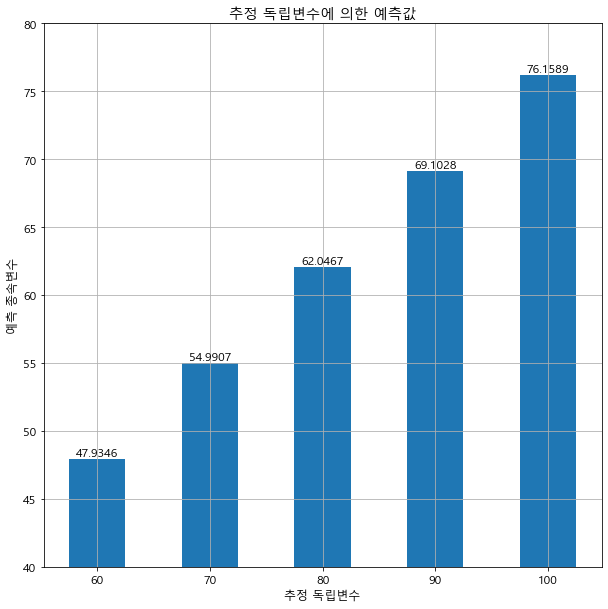

In [91]:
pred_X = np.linspace(60, 100, 5)
pred_Y = model.predict({'x' : pred_X})

plt.figure()
p1 = plt.bar(pred_X, pred_Y, width = 5)
plt.grid()
plt.ylim(40,80)
plt.bar_label(p1)
plt.xlabel('추정 독립변수')
plt.ylabel('예측 종속변수')
plt.title('추정 독립변수에 의한 예측값')

## 8)

In [92]:
df = DataFrame({
    'X' : [11.1, 8.9, 8.8, 8.9, 8.8, 9.9, 10.7, 10.5, 10.5, 10.7],
    'Y' : [11.14, 12.74, 13.13, 11.51, 12.38, 12.60, 11.13, 11.70, 11.02, 11.41]
    })
df

,X,Y
0,11.1,11.14
1,8.9,12.74
2,8.8,13.13
3,8.9,11.51
4,8.8,12.38
5,9.9,12.60
6,10.7,11.13
7,10.5,11.70
8,10.5,11.02
9,10.7,11.41


<AxesSubplot:xlabel='Y', ylabel='Count'>

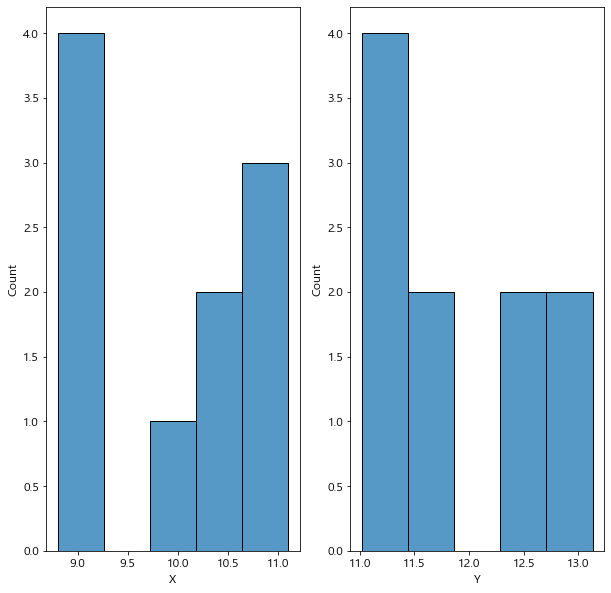

In [93]:
fig, ax = plt.subplots(1,2)

sns.histplot(x = 'X', data = df, ax = ax[0])
sns.histplot(x = 'Y', data = df, ax = ax[1])

,X,Y
X,1.000000,-0.759233
Y,-0.759233,1.000000


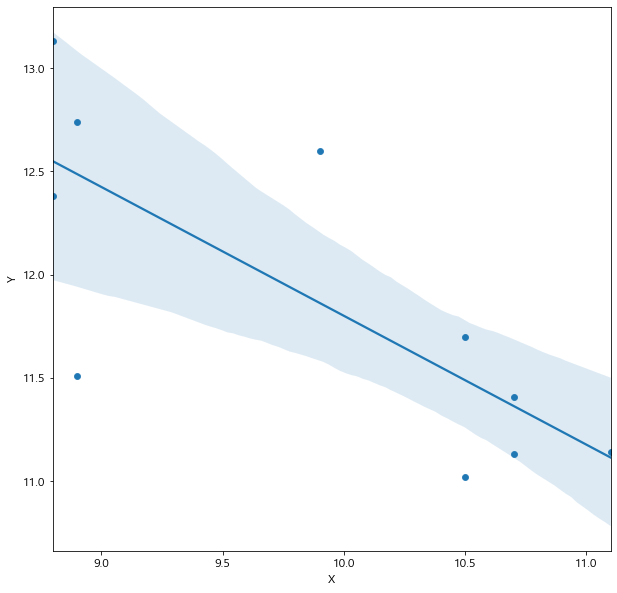

In [94]:
sns.scatterplot(x = 'X', y = 'Y', data = df)
sns.regplot(x = 'X', y = 'Y',data = df)
df.corr()

- 상관계수가 -0.759의 값을 가지기 떄문에 음의 상관관계가 있다.

In [95]:
model = ols('Y ~ X', data=df).fit()
model.summary()

c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 18 Jun 2021   Prob (F-statistic):             0.0109
Time:                        12:10:34   Log-Likelihood:                -6.7294
No. Observations:                  10   AIC:                             17.46
Df Residuals:                       8   BIC:                             18.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.0432      1.877      9.615      0.000      13.716      22.371
X             -0.6242      0.189     -3.300      0.011      -1.060      -0.188
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   2.635
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.309
Skew:                          -0.408   Prob(JB):                        0.857
Kurtosis:                       2.727   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- R-squared 값이 0.576인것으로 보아 회귀모델의 설명도가 낮다.
- F(1,8) = 10.89, pvalue < 0.05 로 이 모형은 통계적으로 유의하다. 선형성은 잘 띄지 않는다.
- t(8) = -3.3, pvalue < 0.05 로 독립변수 X는 통계적으로 유의하다.

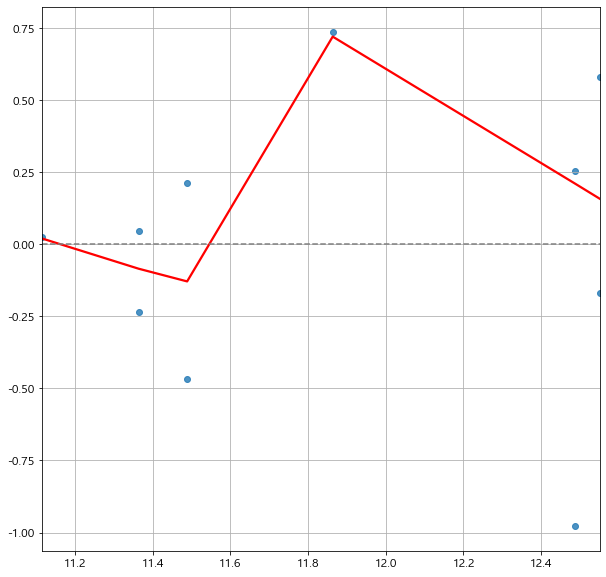

In [96]:
# 잔차가 선형성을 띄지 않는다.
# 모델의 설명력이 낮다.

fitted = model.predict(df)

residual = df['Y'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.grid()
plt.show()

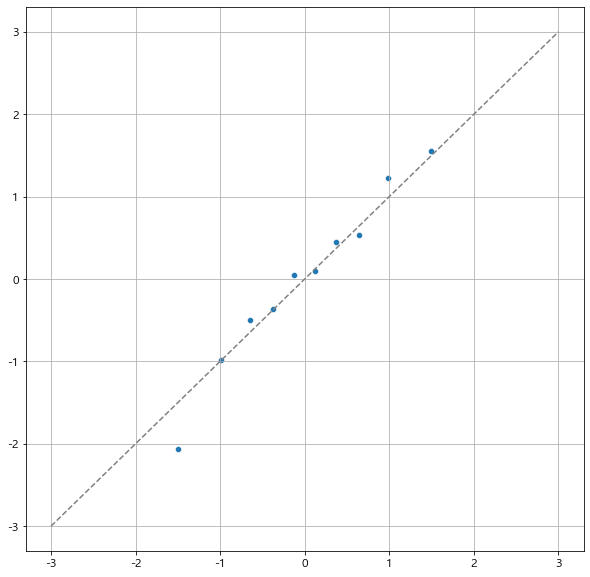

In [97]:
# 잔차의 분포는 정규분포를 따른다.

sr = scipy.stats.zscore(residual)
(x, y), fig = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], linestyle='--', color='grey')
plt.grid()

plt.show()

In [98]:
scipy.stats.shapiro(residual)


ShapiroResult(statistic=0.9743506908416748, pvalue=0.9279944896697998)

- 유의수준 5% 에서 유의하다. 

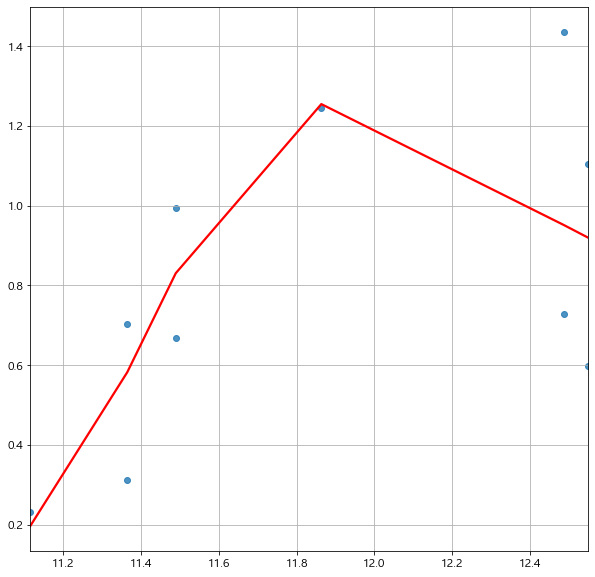

In [99]:
# 등분산성 검정

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws = {'color': 'red'})
plt.grid()
plt.show()

- 잔차의 분산이 일정하지 않다. 모델의 설명력이 낮다.

In [57]:
a = model.params.X
b = model.params.Intercept

print('y = %fx + %f' %(a,b))

y = -0.624211x + 18.043203


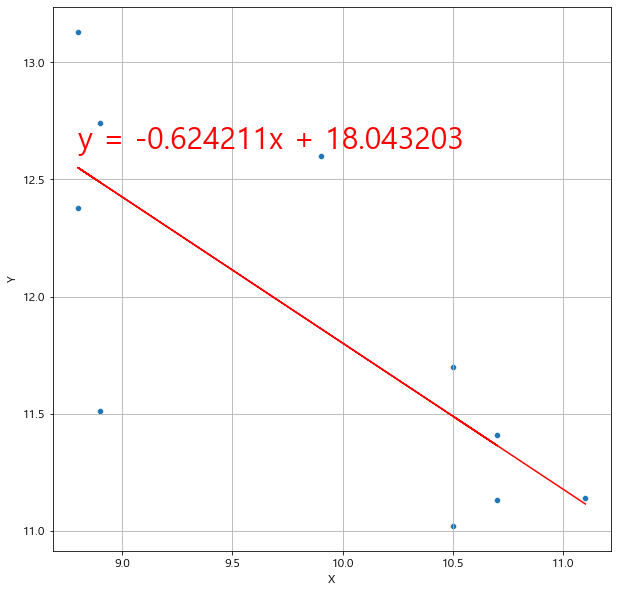

In [58]:
sns.scatterplot(x = 'X', y = 'Y', data =df)
plt.plot(df['X'], model.fittedvalues, color = 'red')

plt.text(df['X'].min(), df['Y'].max()-0.5,'y = %fx + %f' %(a,b), fontsize = 30, color = 'red')
plt.grid()

Text(0.5, 1.0, '추정 독립변수에 의한 예측값')

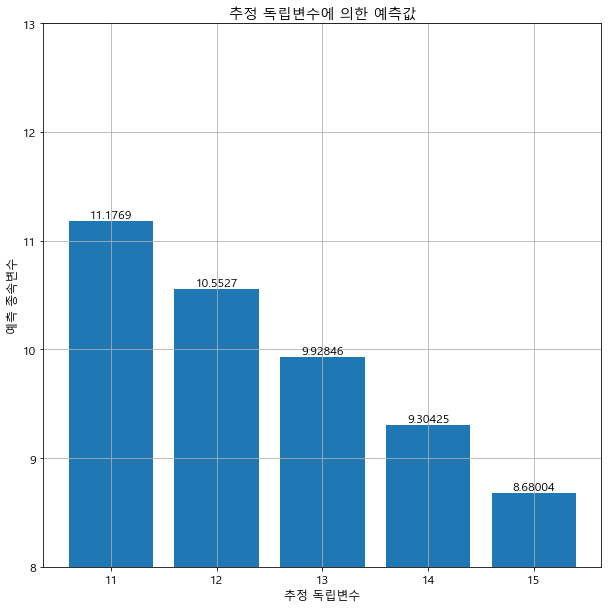

In [59]:
pred_X = np.linspace(11, 15, 5)
pred_Y = model.predict({'X' : pred_X})

plt.figure()
p1 = plt.bar(pred_X, pred_Y)
plt.grid()
plt.ylim(8,13)
plt.bar_label(p1)
plt.xlabel('추정 독립변수')
plt.ylabel('예측 종속변수')
plt.title('추정 독립변수에 의한 예측값')

## 9)

In [67]:
df = DataFrame({'번호' : [1,2,3,4,5,6,7,8,9,10,11,12,13],
               'X_1' : [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
               'X_2' : [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
               'X_3' : [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
               'X_4' : [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12],
               'Y' : [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]}).set_index('번호')


df

,X_1,X_2,X_3,X_4,Y
번호,,,,,
1,7,26,6,60,78.5
2,1,29,15,52,74.3
3,11,56,8,20,104.3
4,11,31,8,47,87.6
5,7,52,6,33,95.9
6,11,55,9,22,109.2
7,3,71,17,6,102.7
8,1,31,22,44,72.5
9,2,54,18,22,93.1


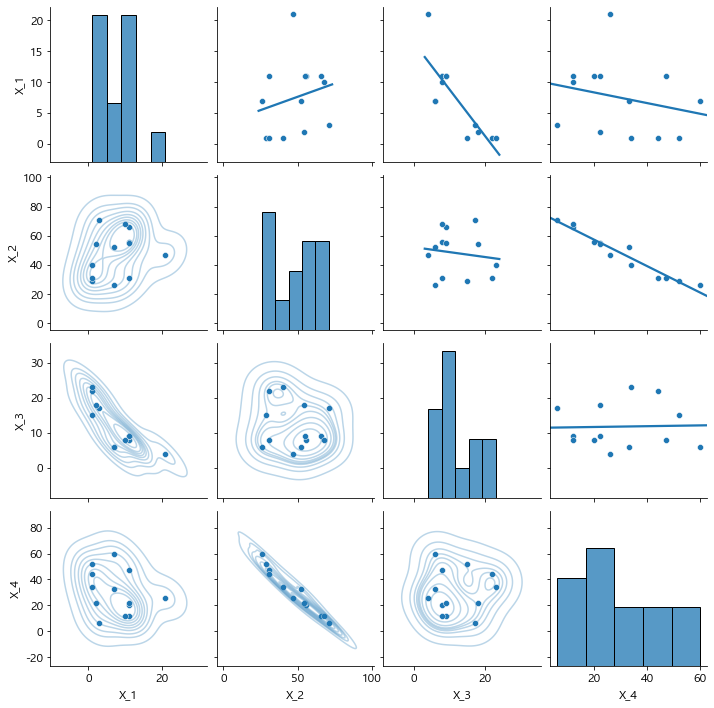

In [68]:
g = sns.pairplot(df.filter(['X_1','X_2','X_3','X_4']))
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)
plt.show()

In [69]:
model = ols('Y ~ X_1 + X_2 + X_3 + X_4', data=df)
fit = model.fit()
fit.summary()

c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           4.76e-07
Time:                        12:01:03   Log-Likelihood:                -26.918
No. Observations:                  13   AIC:                             63.84
Df Residuals:                       8   BIC:                             66.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4054     70.071      0.891      0.399     -99.179     223.989
X_1            1.5511      0.745      2.083      0.071      -0.166       3.269
X_2            0.5102      0.724      0.705      0.501      -1.159       2.179
X_3            0.1019      0.755      0.135      0.896      -1.638       1.842
X_4           -0.1441      0.709     -0.203      0.844      -1.779       1.491
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.320
Skew:                           0.201   Prob(JB):                        0.852
Kurtosis:                       2.345   Cond. No.                     6.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
model.exog_names

['Intercept', 'X_1', 'X_2', 'X_3', 'X_4']

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print("%s의 VIF: %f" % (model.exog_names[i], vif))

X_1의 VIF: 38.496211
X_2의 VIF: 254.423166
X_3의 VIF: 46.868386
X_4의 VIF: 282.512865


- Adj.R-squared 값이0.974로 모델의 설명력이 강하다.
- F 통계량은 `111.5`, 유의확률은 `4.76e-07`로 통계적으로 유의하다.
- 회귀계수들의 p-value가 0.05 이상으로 추정치들이 통계적으로 유의하다고 보기 힘들다.
- 결정계수가 높아 데이터의 설명력은 높지만, 회귀계수들이 통계적으로 유의하지 않기 때문에 Y값을 추정하기 위해 독립변수를 수정할 필요가 있다.
- 변수들의 VIF 값
- `X_1의 VIF: 38.496211`
- `X_2의 VIF: 254.423166`
- `X_3의 VIF: 46.868386`
- `X_4의 VIF: 282.512865`
- 계수가 유의하지 않고 VIF값이 크기때문에 변수를 다시 설정할 필요가 있다
